# Calculus - Week 1

<div style="display:none;">Dive into the fundamentals of calculus for machine learning and data science. This week you'll learn about derivatives, univariate optimization and the difference between symbolic, numerical and automatic differentiation.</div>

In [1]:
import timeit

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

plt.style.use("seaborn-v0_8-whitegrid")

## Derivatives

### Average rate of change of a function

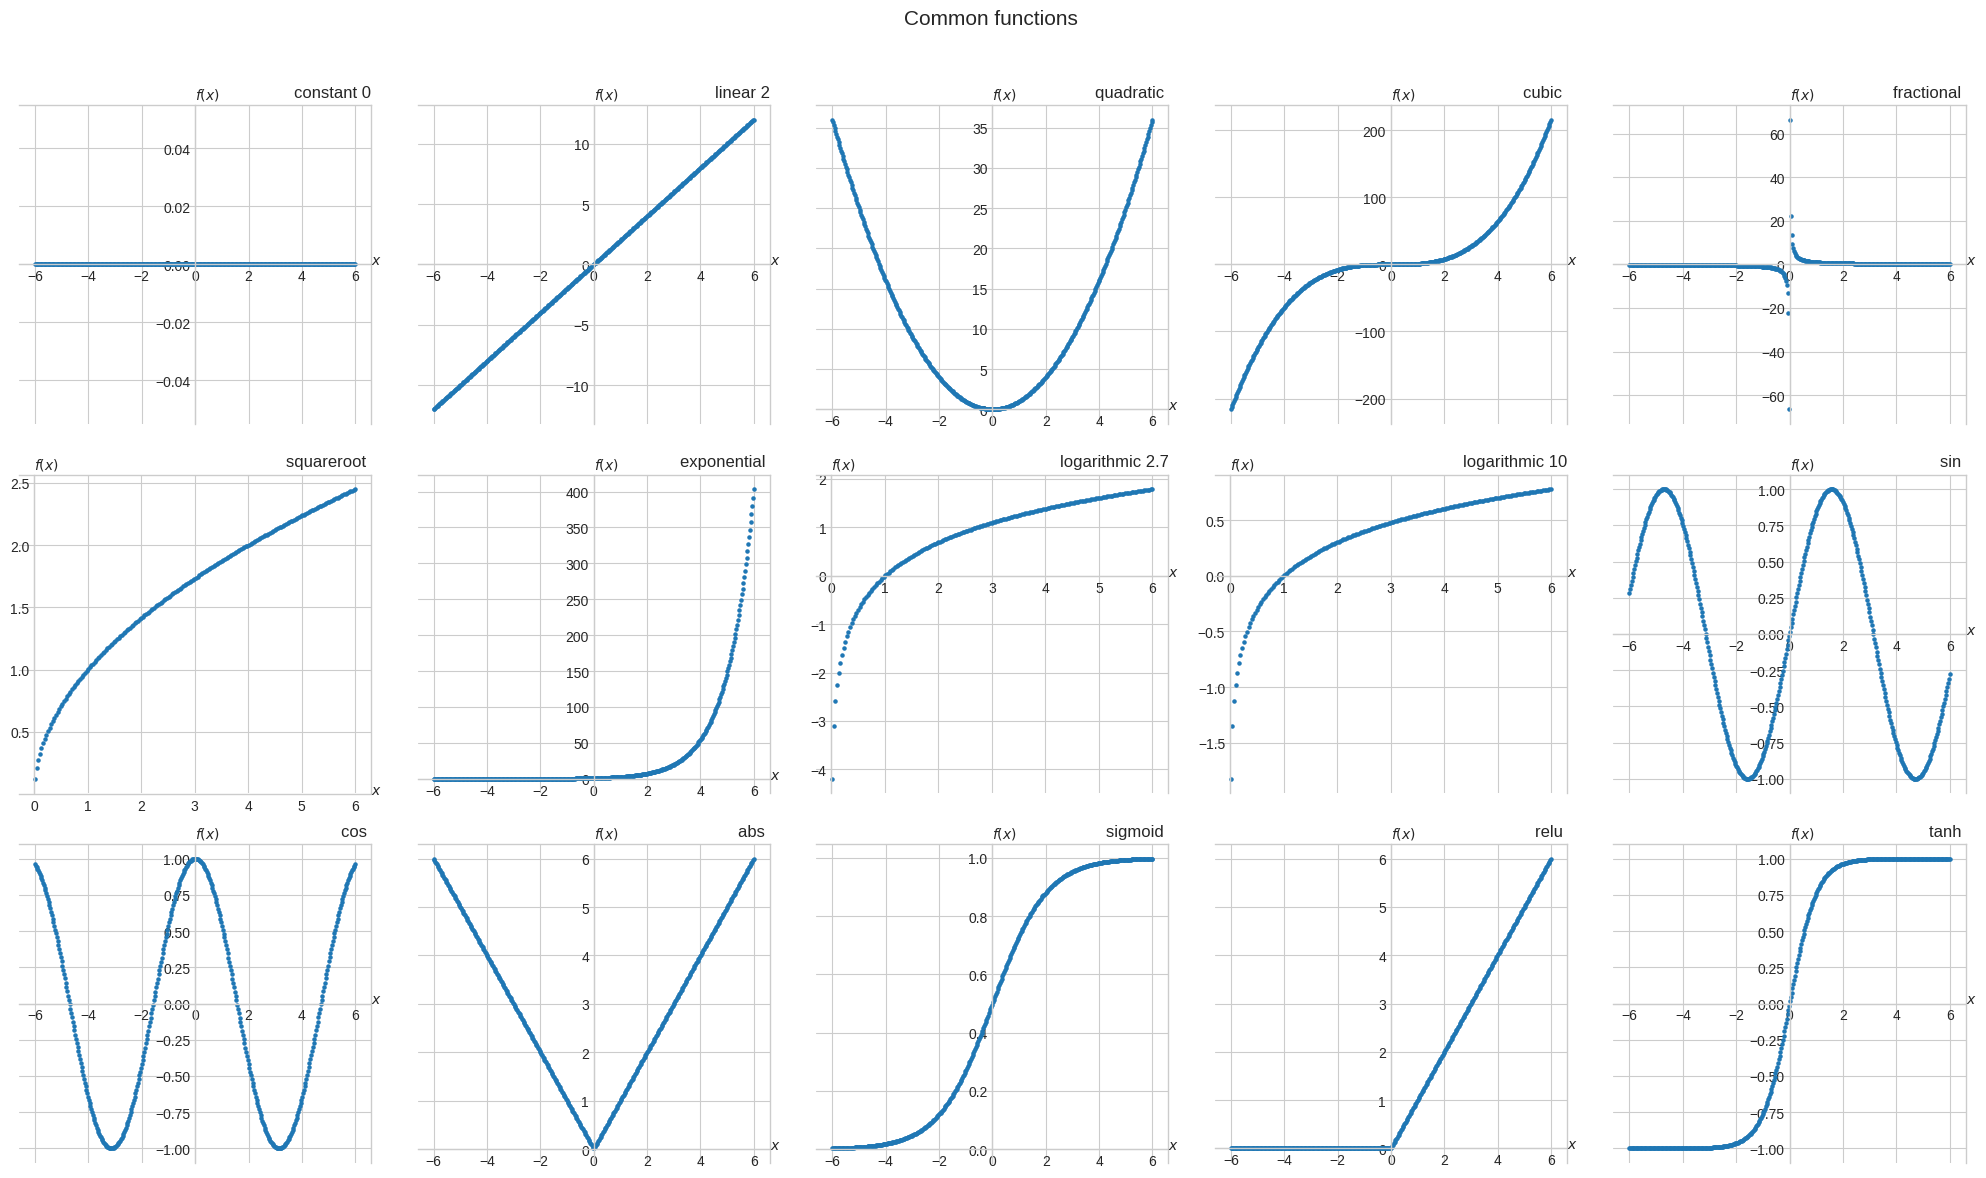

In [2]:
def constant(x, c, *args):
    return np.full_like(x, c)


def linear(x, m, *args):
    return x * m


def quadratic(x, *args):
    return np.power(x, 2)


def cubic(x, *args):
    return np.power(x, 3)


def fractional(x, *args):
    if isinstance(x, np.ndarray):
        x = x.copy()
        x[x == 0] = np.nan
    elif x == 0:
        x = np.nan
    return np.power(x, -1)


def squareroot(x, *args):
    if isinstance(x, np.ndarray):
        x = x.copy()
        x[x < 0] = np.nan
    elif x < 0:
        x = np.nan
    return np.power(x, 1 / 2)


def exponential(x, *args):
    return np.exp(x)


def logarithmic(x, b, *args):
    if isinstance(x, np.ndarray):
        x = x.copy()
        x[x <= 0] = np.nan
    elif x <= 0:
        x = np.nan
    return np.log(x) / np.log(b)


def sin(x, *args):
    return np.sin(x)


def cos(x, *args):
    return np.cos(x)


def abs(x, *args):
    return np.abs(x)


def sigmoid(x, *args):
    return 1 / (1 + np.exp(-x))


def relu(x, *args):
    # np.maximum: element-wise max, not np.max along axis
    return np.maximum(0, x)


def tanh(x, *args):
    return np.tanh(x)


x = np.linspace(-6, 6, 400)
funcs = [
    constant,
    linear,
    quadratic,
    cubic,
    fractional,
    squareroot,
    exponential,
    logarithmic,
    logarithmic,
    sin,
    cos,
    abs,
    sigmoid,
    relu,
    tanh,
]
args = [
    [0],
    [2],
    [None],
    [None],
    [None],
    [None],
    [None],
    [np.e],
    [10],
    [None],
    [None],
    [None],
    [None],
    [None],
    [None],
]

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(5 * 4, 3 * 4))
for ax, f, arg in zip(axs.flatten(), funcs, args):
    ax.scatter(x, f(x, *arg), s=5)
    ax.set_title(
        f.__name__ + " " + " ".join([str(a)[:3] for a in arg if a is not None]),
        loc="right",
    )
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.text(1, 0, "$x$", transform=ax.get_yaxis_transform())
    ax.text(0, 1.02, "$f(x)$", transform=ax.get_xaxis_transform())
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.suptitle("Common functions", fontsize=15)
plt.show()

Let $x = 0.25$ and $\Delta x = 1.25$, we calculate the average rate of change of each function wrt $x$ over the interval $\Delta x$ as

> 📐 $\cfrac{\Delta f}{\Delta x} = \cfrac{f(x + \Delta x) - f(x)}{\Delta x}$

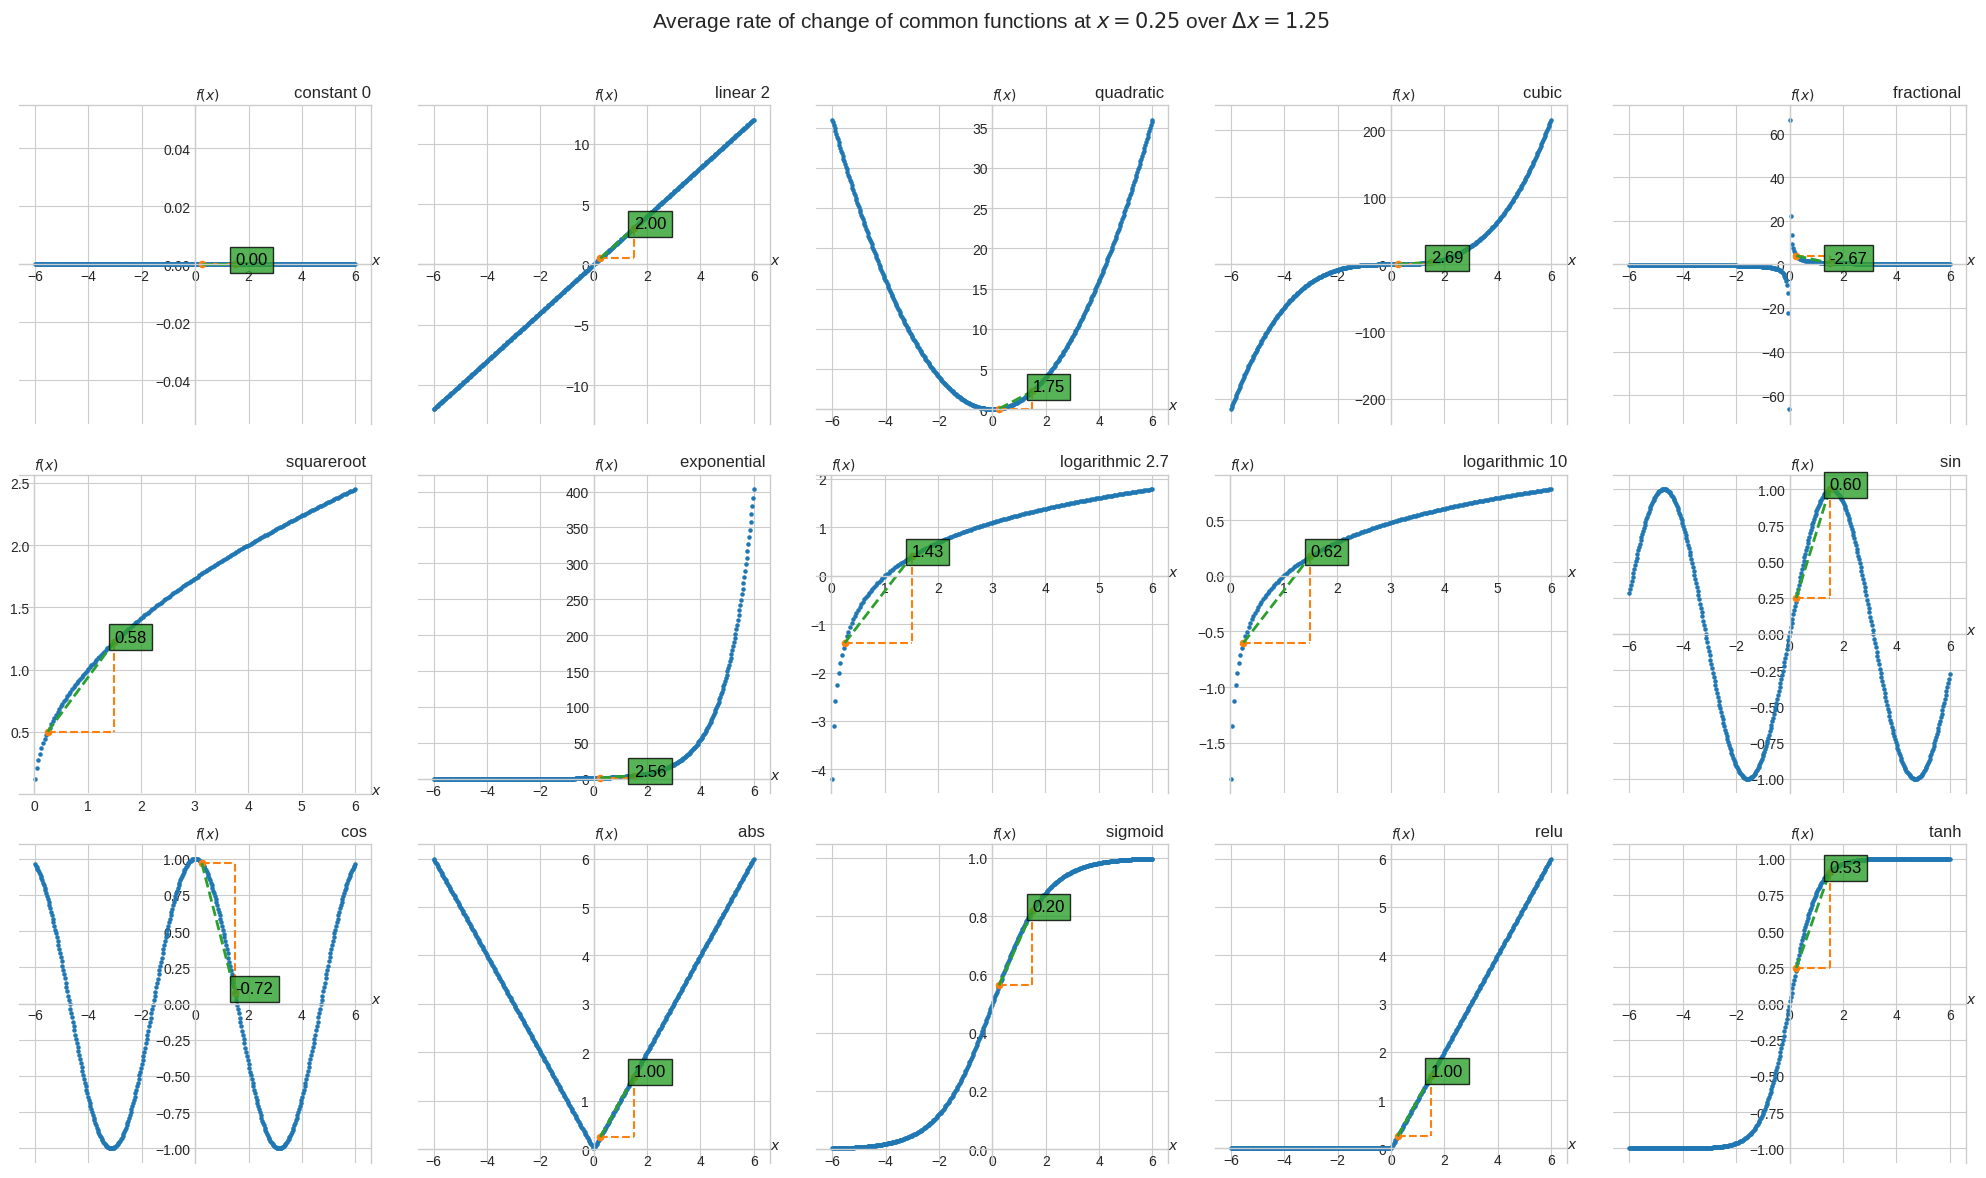

In [3]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(5 * 4, 3 * 4))
for ax, f, arg in zip(axs.flatten(), funcs, args):
    ax.scatter(x, f(x, *arg), s=5)
    x_1 = 0.25
    d_x = 1.25
    ax.scatter(x_1, f(x_1, *arg), s=20, c="tab:orange")
    ax.scatter(x_1 + d_x, f(x_1 + d_x, *arg), s=20, c="tab:orange")
    ax.plot([x_1, x_1 + d_x], [f(x_1, *arg), f(x_1, *arg)], "--", color="tab:orange")
    ax.plot(
        [x_1 + d_x, x_1 + d_x],
        [f(x_1 + d_x, *arg), f(x_1, *arg)],
        "--",
        color="tab:orange",
    )
    ax.plot(
        [x_1, x_1 + d_x],
        [f(x_1, *arg), f(x_1 + d_x, *arg)],
        "--",
        linewidth=2,
        color="tab:green",
    )
    slope = (f(x_1 + d_x, *arg) - f(x_1, *arg)) / d_x
    ax.text(
        x_1 + d_x,
        f(x_1 + d_x, *arg),
        f"{slope:.2f}",
        fontsize=12,
        color="k",
        bbox=dict(facecolor="tab:green", alpha=0.8),
    )
    ax.set_title(
        f.__name__ + " " + " ".join([str(a)[:3] for a in arg if a is not None]),
        loc="right",
    )
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.text(1, 0, "$x$", transform=ax.get_yaxis_transform())
    ax.text(0, 1.02, "$f(x)$", transform=ax.get_xaxis_transform())
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.suptitle(
    "Average rate of change of common functions at $x=0.25$ over $\\Delta x = 1.25$",
    fontsize=15,
)
plt.show()

As $\Delta x$ approaches 0 we get the instantaneous rate of change of each function wrt x.

> 📐 $\lim_{{\Delta x}\to{0}}\cfrac{\Delta f}{\Delta x} = \lim_{{\Delta x}\to{0}}\cfrac{f(x + \Delta x) - f(x)}{\Delta x}$

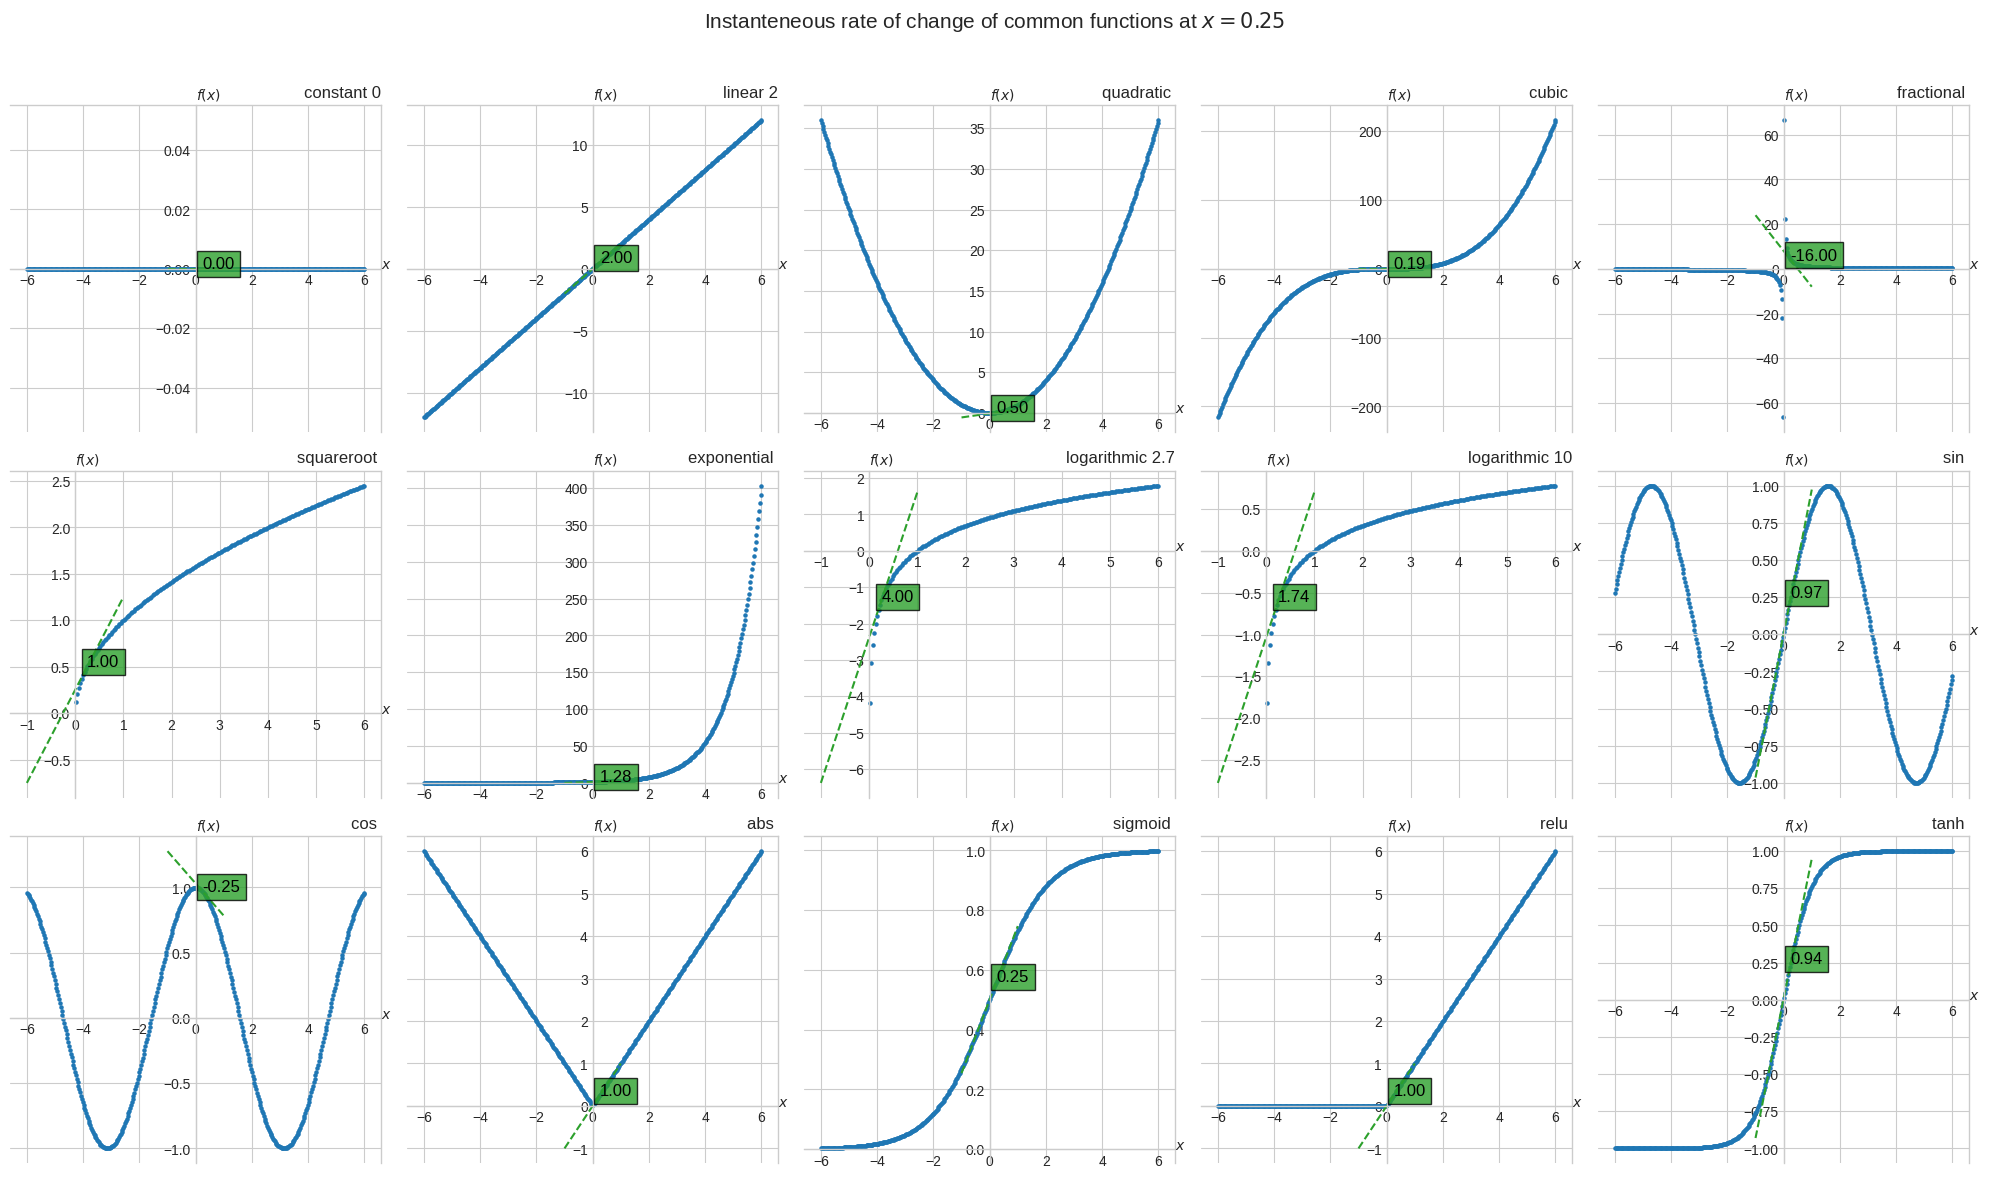

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(5 * 4, 3 * 4))
for ax, f, arg in zip(axs.flatten(), funcs, args):
    ax.scatter(x, f(x, *arg), s=5)
    x_1 = 0.25
    h = 1e-6
    # y-y1 = m(x-x1)
    # y = m(x - x1) + y1
    slope = (f(x_1 + h, *arg) - f(x_1, *arg)) / h
    tan_range = np.linspace(-1, 1)
    ax.plot(
        tan_range,
        slope * (tan_range - x_1) + f(x_1, *arg),
        "--",
        color="tab:green",
    )
    ax.text(
        x_1,
        f(x_1, *arg),
        f"{slope:.2f}",
        fontsize=12,
        color="k",
        bbox=dict(facecolor="tab:green", alpha=0.8),
    )
    ax.set_title(
        f.__name__ + " " + " ".join([str(a)[:3] for a in arg if a is not None]),
        loc="right",
    )
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.text(1, 0, "$x$", transform=ax.get_yaxis_transform())
    ax.text(0, 1.02, "$f(x)$", transform=ax.get_xaxis_transform())
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.suptitle(
    "Instanteneous rate of change of common functions at $x=0.25$", fontsize=15
)
plt.show()

### Derivative of a function

> 🔑 The derivative of the function $f(x)$ wrt $x$ is $\cfrac{d}{dx}f(x) = \lim_{{\Delta x}\to{0}}\cfrac{\Delta f}{\Delta x} = \lim_{{\Delta x}\to{0}}\cfrac{f(x + \Delta x) - f(x)}{\Delta x}$

The derivative of the common functions seen so far are:

$\cfrac{d}{dx}(k) = \lim_{{\Delta x}\to{0}} \cfrac{k - k}{\Delta x} = 0$

$\cfrac{d}{dx}(2x) = \lim_{{\Delta x}\to{0}} \cfrac{2(x+\Delta x) - 2x}{\Delta x} = 2$

$\cfrac{d}{dx}(x^2) = \lim_{{\Delta x}\to{0}} \cfrac{(x+\Delta x)^2 - x^2}{\Delta x} = 2x$

$\cfrac{d}{dx}(x^3) = \lim_{{\Delta x}\to{0}} \cfrac{(x+\Delta x)^3 - x^3}{\Delta x} = 3x^2$

$\cfrac{d}{dx}\left( \cfrac{1}{x} \right) = \cfrac{d}{dx}(x^{-1}) = \lim_{{\Delta x}\to{0}} \cfrac{(x+\Delta x)^{-1} - x^{-1}}{\Delta x} = -x^{-2} \text{ for } x \ne 0$

$\cfrac{d}{dx}(\sqrt{x}) = \cfrac{d}{dx}(x^{\frac{1}{2}}) = \lim_{{\Delta x}\to{0}} \cfrac{(x+\Delta x)^{\frac{1}{2}} - x^{\frac{1}{2}}}{\Delta x} = \cfrac{1}{2}x^{-\frac{1}{2}} \text{ for } x \ge 0$

$\cfrac{d}{dx}(e^x) = \lim_{{\Delta x}\to{0}} \cfrac{e^{x+\Delta x} - e^x}{\Delta x} = e^x$

$\cfrac{d}{dx}(\log_e(x)) = \lim_{{\Delta x}\to{0}} \cfrac{\ln(x+\Delta x) - \ln(x)}{\Delta x} = \cfrac{1}{x\ln(e)} \text{ for } x > 0$

$\cfrac{d}{dx}(\log_{10}(x)) = \lim_{{\Delta x}\to{0}} \cfrac{\log_{10}(x+\Delta x) - \log_{10}(x)}{\Delta x} = \cfrac{1}{x \ln(10)} \text{ for } x > 0$

$\cfrac{d}{dx}(\sin(x)) = \lim_{{\Delta x}\to{0}} \cfrac{\sin(x+\Delta x) - \sin(x)}{\Delta x} = \cos(x)$

$\cfrac{d}{dx}(\cos(x)) = \lim_{{\Delta x}\to{0}} \cfrac{\cos(x+\Delta x) - \cos(x)}{\Delta x} = -\sin(x)$

$\cfrac{d}{dx}(|x|) = \lim_{{\Delta x}\to{0}} \cfrac{|x+\Delta x| - |x|}{\Delta x} = \begin{cases}1 \text{ if } x > 0\\-1 \text{ if } x < 0\\\text{undefined if } x = 0\end{cases}$

$\cfrac{d}{dx}(\sigma(x)) = \lim_{{\Delta x}\to{0}} \cfrac{\sigma(x+\Delta x) - \sigma(x)}{\Delta x} = \sigma(x)(1-\sigma(x))$

$\cfrac{d}{dx}(\text{ReLU}(x)) = \lim_{{\Delta x}\to{0}} \cfrac{\text{ReLU}(x+\Delta x) - \text{ReLU}(x)}{\Delta x} = \begin{cases}1 \text{ if } x > 0\\0 \text{ if } x < 0\\\text{undefined if } x = 0\end{cases}$

$\cfrac{d}{dx}(\tanh(x)) = \lim_{{\Delta x}\to{0}} \cfrac{\tanh(x+\Delta x) - \tanh(x)}{\Delta x} = 1 - \text{tanh}(x)^2$

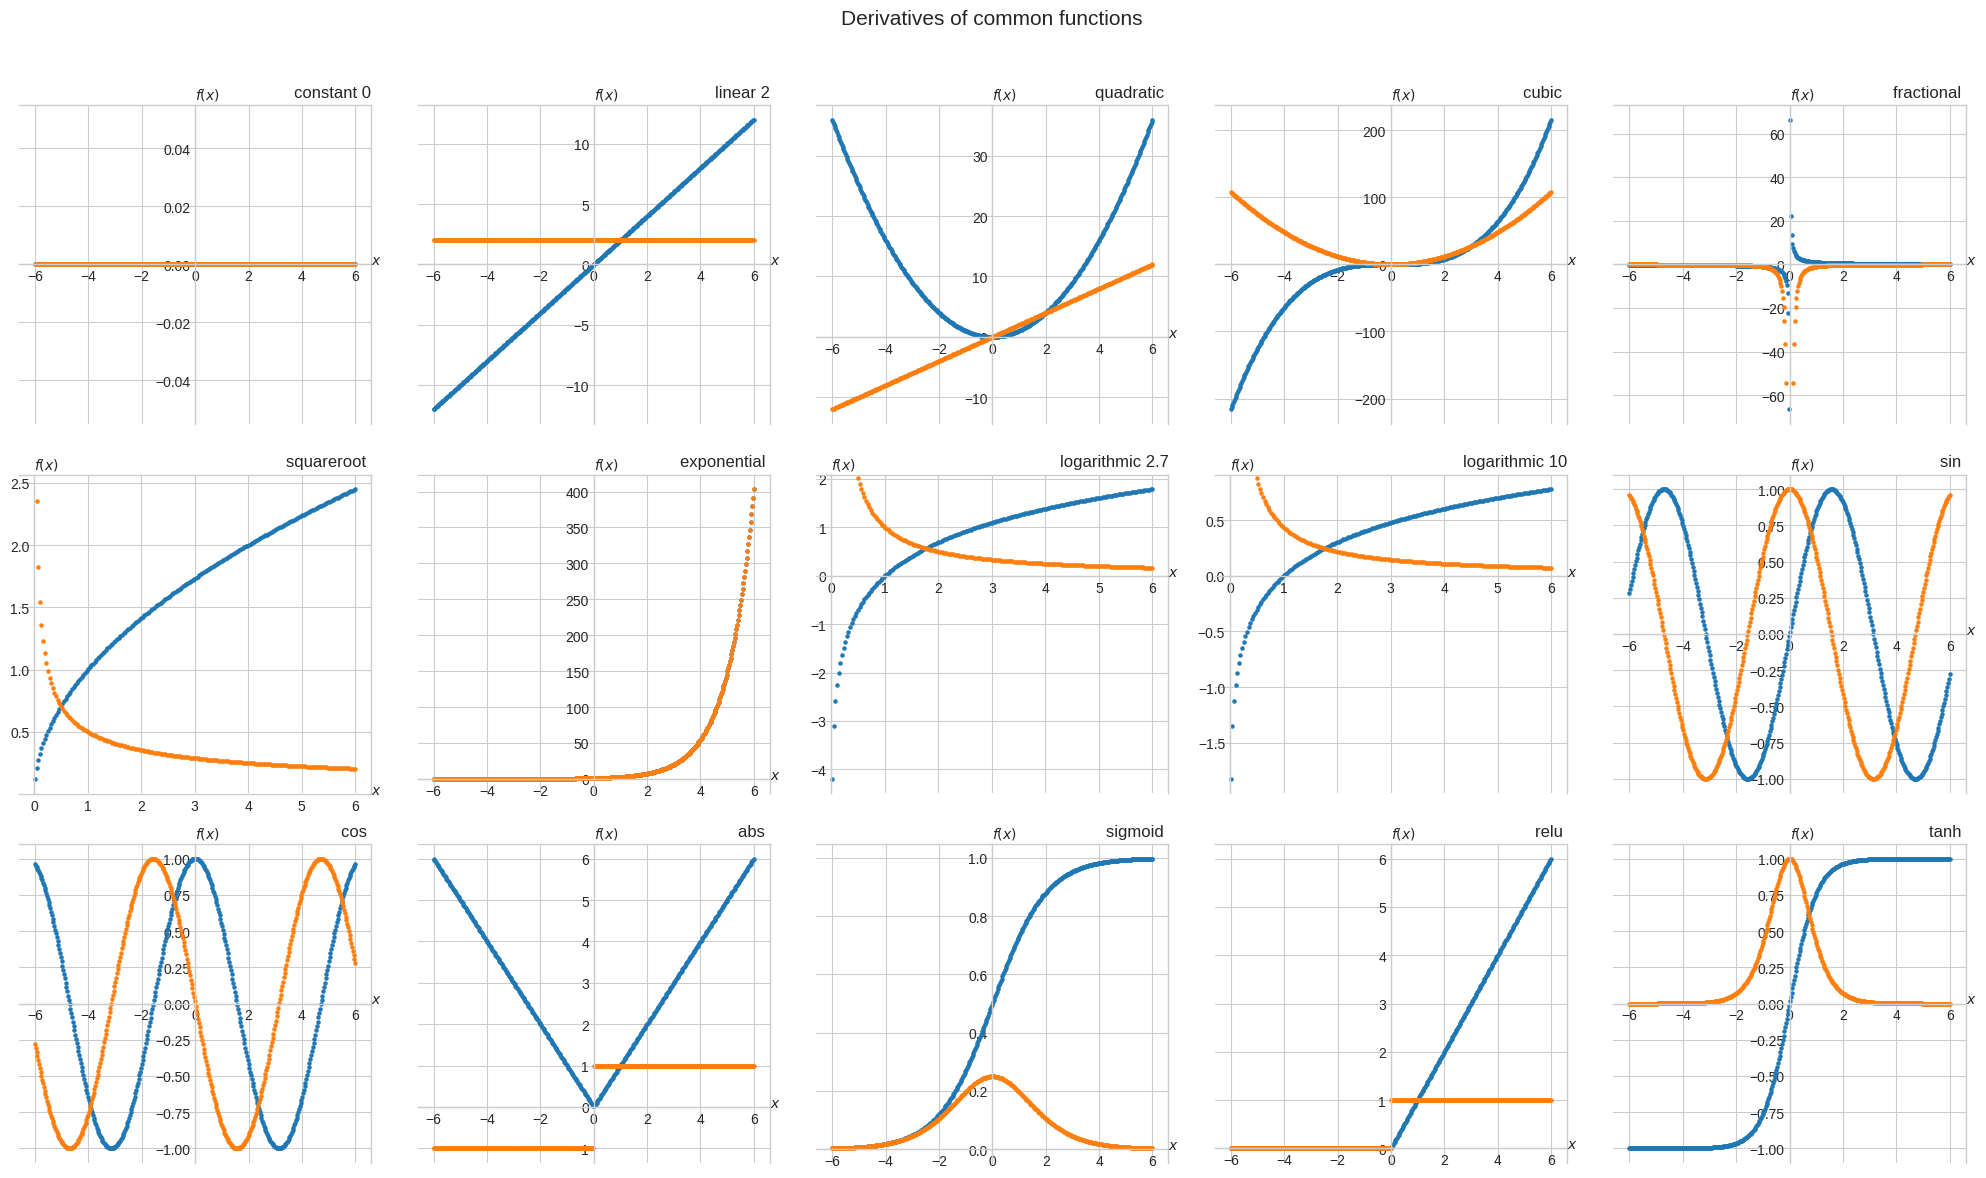

In [5]:
def d_constant(x, *args):
    return np.full_like(x, 0)


def d_linear(x, m, *args):
    return np.full_like(x, m)


def d_quadratic(x, *args):
    return 2 * x


def d_cubic(x, *args):
    return 3 * (x**2)


def d_fractional(x, *args):
    if isinstance(x, np.ndarray):
        x = x.copy()
        x[x == 0] = np.nan
    elif x == 0:
        x = np.nan
    return -(x**-2)


def d_squareroot(x, *args):
    if isinstance(x, np.ndarray):
        x = x.copy()
        x[x < 0] = np.nan
    elif x < 0:
        x = np.nan
    return (1 / 2) * x ** (-1 / 2)


def d_exponential(x, *args):
    return np.exp(x)


def d_logarithmic(x, b, *args):
    if isinstance(x, np.ndarray):
        x = x.copy()
        x[x <= 0] = np.nan
    elif x <= 0:
        x = np.nan
    return 1 / (x * np.log(b))


def d_sin(x, *args):
    return np.cos(x)


def d_cos(x, *args):
    return -np.sin(x)


def d_abs(x, *args):
    if isinstance(x, np.ndarray):
        x = x.copy()
        x[x == 0] = np.nan
    elif x == 0:
        x = np.nan
    return np.sign(x)


def d_sigmoid(x, *args):
    return sigmoid(x) * (1 - sigmoid(x))


def d_relu(x, *args):
    if isinstance(x, np.ndarray):
        x = x.copy()
        x[x == 0] = np.nan
    elif x == 0:
        x = np.nan
    return np.sign(relu(x))


def d_tanh(x, *args):
    return 1 - np.tanh(x) ** 2


d_funcs = [
    d_constant,
    d_linear,
    d_quadratic,
    d_cubic,
    d_fractional,
    d_squareroot,
    d_exponential,
    d_logarithmic,
    d_logarithmic,
    d_sin,
    d_cos,
    d_abs,
    d_sigmoid,
    d_relu,
    d_tanh,
]

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(5 * 4, 3 * 4))
for ax, f, df, arg in zip(axs.flatten(), funcs, d_funcs, args):
    ax.scatter(x, f(x, *arg), s=5)
    f_lims = np.array(ax.get_ylim())
    ax.scatter(x, df(x, *arg), s=5)
    df_lims = np.array(ax.get_ylim())
    if any(abs(df_lims) > 10 * abs(f_lims)):
        ax.set_ylim(f_lims)
    ax.set_title(
        f.__name__ + " " + " ".join([str(a)[:3] for a in arg if a is not None]),
        loc="right",
    )
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.text(1, 0, "$x$", transform=ax.get_yaxis_transform())
    ax.text(0, 1.02, "$f(x)$", transform=ax.get_xaxis_transform())
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.suptitle("Derivatives of common functions", fontsize=15)
plt.show()

### Not differentiable functions

> 🔑 A function is not differentiable at $x = a$ if $\lim_{x\to{a}}\cfrac{f(x)-f(a)}{x-a}$ does not exist

Visually, we can determine whether a function is not differentiable if we see

1. a cusp or a corner

2. a jump or point of discontinuity

3. a vertical tangent

#### Proof that |x| is not differentiable at 0

$\cfrac{df}{dx}(a) = \lim_{x\to{a}}\cfrac{f(x)-f(a)}{x-a}$

$\lim_{x\to{0}}\cfrac{f(x)-f(0)}{x-0}$

$\lim_{x\to{0}}\cfrac{|x|}{x}$

$\lim_{x\to{0}^+}\cfrac{x}{x} = 1$

$\lim_{x\to{0}^-}\cfrac{-x}{x} = -1$

$\lim_{x\to{0}}\cfrac{|x|}{x}$ does not exist because $\lim_{x\to{0}^+} \ne \lim_{x\to{0}^-}$

#### Proof that ReLU is not differentiable at 0

$\cfrac{df}{dx}(a) = \lim_{x\to{a}}\cfrac{f(x)-f(a)}{x-a}$

$\lim_{x\to{0}}\cfrac{f(x)-f(0)}{x-0}$

$\lim_{x\to{0}}\cfrac{\text{ReLU}(x)}{x}$

$\lim_{x\to{0}^+}\cfrac{x}{x} = 1$

$\lim_{x\to{0}^-}\cfrac{0}{x} = 0$

$\lim_{x\to{0}}\cfrac{\text{ReLU}(x)}{x}$ does not exist because $\lim_{x\to{0}^+} \ne \lim_{x\to{0}^-}$

That being said the universal convention in machine learning applications is to assign a derivative of 0 at the non-differentiable point 0, such that

$\text{ReLU}'(x) = \begin{cases}1 \text{ if } x > 0\\0 \text{ if } x \le 0\end{cases}$

This won't make a lot of sense now, because we haven't introduced backward propagation yet, but it's a bit imprecise to say that "conventionally the derivative of ReLU at 0 is 0".

Frameworks like Tensorflow, for example, just do not propagate the gradient when the ReLU activation is 0.

Source: https://github.com/tensorflow/tensorflow/blob/0aecf379b7bbdbe93be91643825f0ae94171d509/tensorflow/core/kernels/relu_op_functor.h#L52

#### Proof that radicals are not differentiable at 0

$\cfrac{df}{dx}(a) = \lim_{x\to{a}}\cfrac{f(x)-f(a)}{x-a}$

$\lim_{x\to{0}}\cfrac{f(x)-f(0)}{x-0}$

$\lim_{x\to{0}^+}\cfrac{\sqrt{x}}{x}$

$\lim_{x\to{0}^+}\cfrac{\sqrt{x}\sqrt{x}}{x\sqrt{x}}$

$\lim_{x\to{0}^+}\cfrac{x}{x\sqrt{x}}$

$\lim_{x\to{0}^+}\cfrac{1}{\sqrt{x}}$

$\lim_{x\to{0}^+}\cfrac{1}{\sqrt{x}}$ does not exist because $\lim_{x\to{0}^+}\cfrac{1}{\sqrt{x}} \rightarrow +\infty$

### The inverse function and its derivative

$\sqrt{x}$ is the inverse of $x^2$, because $x \xrightarrow{x^2} x^2 \xrightarrow{\sqrt{x}} x$

> 🔑 $g(y)$ is the inverse of $f(x)$ if $x \xrightarrow{f(x)} y \xrightarrow{g(y)} x$. In other words the inverse function undoes what the function does.

$\cfrac{1}{x}$ is NOT the inverse of $x$, because $x \xrightarrow{x} x \xrightarrow{\frac{1}{x}} \cfrac{1}{x}$

$\ln x$ is the inverse of $e^x$, because $x \xrightarrow{\ln x} \ln x \xrightarrow{e^x} x$

> 🔑 The derivative of the inverse function is $g\prime(y) = \cfrac{1}{f\prime(x)}$

Let's verify it.

$\cfrac{d}{dy}\ln{y} = \cfrac{1}{y}$ but also $\cfrac{1}{\cfrac{d}{dx}e^{\ln y}} = \cfrac{1}{y}$

$\cfrac{d}{dy}\sqrt{y} = \cfrac{d}{dy}y^{\frac{1}{2}} = \cfrac{1}{2}y^{-\frac{1}{2}}$ but also $\cfrac{1}{\cfrac{d}{dx}\left( y^{\frac{1}{2}} \right)^2} = \cfrac{1}{2y^{\frac{1}{2}}} = \cfrac{1}{2}y^{-\frac{1}{2}} = \cfrac{1}{2}\cfrac{1}{y^\frac{1}{2}} = \cfrac{1}{2}y^{-\frac{1}{2}}$



In [6]:
if squareroot(quadratic(x_1)) == x_1:
    assert 1 / d_quadratic(x_1) == d_squareroot(quadratic(x_1))

if np.exp(np.log(x_1)):
    assert 1 / d_exponential(x_1) == d_logarithmic(exponential(x_1), b=np.e)

### Derivative rules

#### Constant multiple rule

> 📐 $\cfrac{d}{dx}[cf(x)] = cf'(x)$

Example:

$y = 5x^2$

$\cfrac{dy}{dx} = 5 \cfrac{d}{dx}x^2$

$\cfrac{dy}{dx} = 10x$

In [7]:
x = sp.symbols("x")
expr = 5 * x**2
expr.diff()

10*x

#### Sum or difference rule

> 📐 $\cfrac{d}{dx}[f(x) + g(x)] = f'(x) + g'(x)$

Example:

$y = 5x^2 + 3x + 1$

$\cfrac{dy}{dx} = \cfrac{d}{dx}5x^2 + \cfrac{d}{dx}3x + 1$

$\cfrac{dy}{dx} = 10x + 3$

In [8]:
x = sp.symbols("x")
expr = 5 * x**2 + 3 * x + 1
expr.diff()

10*x + 3

#### Product rule

> 📐 $\cfrac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x)$

Example:

$y = (5x^2)(3x + 1)$

$\cfrac{dy}{dx} = \cfrac{d}{dx}(5x^2)(3x + 1) + \cfrac{d}{dx}(3x + 1)(5x^2)$

$\cfrac{dy}{dx} = 5\left(\cfrac{d}{dx}(x^2)(3x + 1) + \cfrac{d}{dx}(3x + 1)(x^2)\right)$

$\cfrac{dy}{dx} = 5(2x(3x+1) + 3(x^2))$

$\cfrac{dy}{dx} = 5(6x^2+2x+3x^2)$

$\cfrac{dy}{dx} = 5(9x^2+2x)$

In [9]:
x = sp.symbols("x")
expr = (5 * x**2) * (3 * x + 1)
expr.diff().simplify()

5*x*(9*x + 2)

#### Quotient rule

> 📐 $\cfrac{d}{dx}\left[\cfrac{f(x)}{g(x)}\right] = \cfrac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}$

Example:

$y = \cfrac{5x^2}{3x + 1}$

$\cfrac{dy}{dx} = \cfrac{\cfrac{d}{dx}(5x^2)(3x + 1)-\cfrac{d}{dx}(3x + 1)(5x^2)}{(3x + 1)^2}$

$\cfrac{dy}{dx} = 5\left(\cfrac{\cfrac{d}{dx}(x^2)(3x + 1)-\cfrac{d}{dx}(3x + 1)(x^2)}{(3x + 1)^2}\right)$

$\cfrac{dy}{dx} = 5\left(\cfrac{2x(3x+1) - 3(x^2)}{(3x + 1)^2}\right)$

$\cfrac{dy}{dx} = 5\left(\cfrac{6x^2+2x-3x^2}{(3x + 1)^2}\right)$

$\cfrac{dy}{dx} = \cfrac{5(3x^2+2x)}{(3x + 1)^2}$

In [10]:
x = sp.symbols("x")
expr = (5 * x**2) / (3 * x + 1)
expr.diff().simplify().factor()

5*x*(3*x + 2)/(3*x + 1)**2

#### Chain rule

> 📐 $\cfrac{d}{dx}[g(f(x))] = g'(f(x))f'(x)$

Example I:

$y = 5(3x + 1)^2$

$\cfrac{dy}{dx} = 5\left(\cfrac{d}{dx}(3x+1)^2\cfrac{d}{dx}3x + 1\right)$

$\cfrac{dy}{dx} = 5(2(3x+1)3)$

$\cfrac{dy}{dx} = 30(3x+1)$

In [11]:
x = sp.symbols("x")
expr = 5 * (3 * x + 1) ** 2
expr.diff().simplify().factor()

30*(3*x + 1)

Example II:

$y = e^{3x+1}$

$\cfrac{dy}{dx} = \cfrac{d}{dx}e^{3x+1}\cfrac{d}{dx}3x+1$

$\cfrac{dy}{dx} = e^{3x+1}3$

In [12]:
x = sp.symbols("x")
expr = sp.exp(3 * x + 1)
expr.diff()

3*exp(3*x + 1)

## Univariate optimization

The probability of getting $k$ successes in $n$ independent Bernoulli trials with success probability $p$ for each trial is:

$Pr(k, n, p) = \binom{n}{k}p^k(1-p)^{n-k}$

To motivate the maximization of $Pr(k, n, p)$ wrt $p$, let's imagine we're playing a game where we need to toss a coin 10 times and we win only if we get 7 heads and 3 tails.

We can use a biased coin for this game and we can customize the bias $p$.

To maximize $Pr(k, n, p)$ wrt $p$ we can omit the binomial coefficient.

$p^k(1-p)^{n-k}$

In [13]:
p, k, n = sp.symbols("p, k, n")
pr = p**k * (1 - p) ** (n - k)
pr

p**k*(1 - p)**(-k + n)

Let's find the derivative wrt $p$.

In [14]:
dprdp = sp.diff(pr, p)
dprdp.simplify().factor()

-(k*p**k*(1 - p)**(-k + n + 1) + k*p**(k + 1)*(1 - p)**(-k + n) - n*p**(k + 1)*(1 - p)**(-k + n))/(p*(p - 1))

Let's evaluate it for $k=7$ and $n=10$ and visualize both $Pr(7, 10, p)$ and $\cfrac{d}{dp}Pr(7, 10, p)$

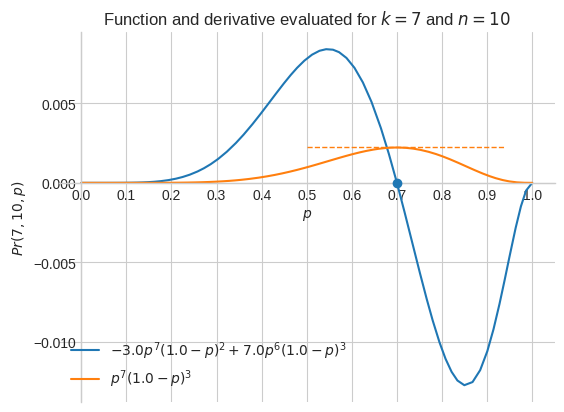

In [15]:
def move_spplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines["right"].set_color("none")
    backend.ax.spines["bottom"].set_position("zero")
    backend.ax.spines["top"].set_color("none")
    plt.close(backend.fig)


p1 = sp.plot(
    dprdp.evalf(subs={k: 7, n: 10}),
    pr.evalf(subs={k: 7, n: 10}),
    (p, 0, 1),
    legend=True,
    ylabel="$Pr(7, 10, p)$",
    title="Function and derivative evaluated for $k=7$ and $n=10$",
    show=False,
)

fig, ax = plt.subplots()
move_spplot_to_axes(p1, ax)
plt.axhline(
    y=pr.evalf(subs={k: 7, n: 10, p: 0.7}),
    xmin=0.5,
    xmax=0.9,
    color="tab:orange",
    linestyle="--",
    linewidth=1,
)
plt.scatter(0.7, 0, zorder=3)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

When $k = 7$ and $n = 10$, the maximum of $Pr(7, 10, p)$ is for $p=0.7$, that is when $\cfrac{d}{dp}Pr(7, 10, p) = 0$

Let's prove it analytically.

In [16]:
sp.solve(dprdp, p)

[k/n]

Generally, $Pr(k, n, p)$ is maximized for $p=k/n$.

Let's evaluate it for $k = 7$ and $n = 10$.

In [17]:
sp.solve(dprdp, p)[0].evalf(subs={k: 7, n: 10})

0.700000000000000

It turns out there is an easier way to maximize $p^k(1-p)^{n-k}$.

And it's based on the fact that $\max_{p} p^k(1-p)^{n-k} = \max_{p} \ln p^k(1-p)^{n-k}$.

Using the product rule $\ln (ab) = \ln a + \ln b$ and the power rule $\ln a^b = b \ln a$ we get

$\ln p^k(1-p)^{n-k} = k \ln p + (n-k) \ln (1-p)$

Calculating the derivative of $k \ln p + (n-k) \ln (1-p)$ is a lot easier

$\cfrac{d}{dx}k \ln p + (n-k) \ln (1-p)$

$\cfrac{d}{dx}k \ln p + \cfrac{d}{dx}(n-k) \ln (1-p)$

$k \cfrac{d}{dx} \ln p + (n-k)\cfrac{d}{dx} \ln (1-p)$

$k \cfrac{1}{p} + (n-k)\cfrac{1}{1-p}(-1)$

$k \cfrac{1}{p} - (n-k)\cfrac{1}{1-p}$

Now let's solve it.

$k \cfrac{1}{p} - (n-k)\cfrac{1}{1-p} = 0$

$\cfrac{k(1-p)-(n-k)p}{p(1-p)} = 0$

$k(1-p)-(n-k)p = 0$

$k - kp - np + kp = 0$

$k - np = 0$

$p = \cfrac{k}{n}$

## Computational efficiency of symbolic, numerical and automatic differentiation

Symbolic differentiation produces exact derivatives like when computing derivatives by hand. It's fast for simple functions, but it slows down as the complexity increases.

Numerical differentiation produces an approximation that is somewhat similar to computing the instantaneous rate of change for a very small $\Delta x$. It's slow.

Automatic differentiation produces an approximation by constructing a computational graph consisting of basic functions and computing the derivative at each node using the chain rule. It's fast even for complex functions. It's the most common approach used in neural networks.

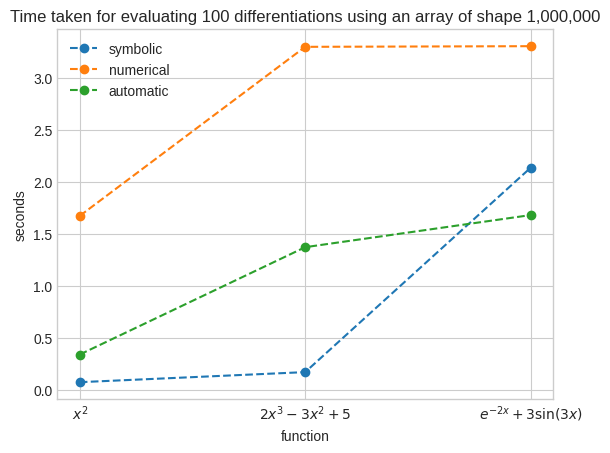

In [18]:
def get_setup(k, v):
    sym_setup = f"""
import sympy as sp
import numpy as np
x_arr = np.linspace(-6, 6, 1000000)
def f(x):
    return {v}
def diff():
    x = sp.symbols("x")
    return sp.lambdify(x, sp.diff(f(x), x), "numpy")(x_arr)
"""

    num_setup = f"""
import numpy as np
x_arr = np.linspace(-6, 6, 1000000)
def f(x):
    return {v}
def diff():
    return np.gradient(f(x_arr), x_arr)
"""

    aut_setup = f"""
from jax import vmap, grad
import jax.numpy as jnp
x_arr = jnp.linspace(-6, 6, 1000000)
def f(x):
    return {v}
def diff():
    return vmap(grad(f))(x_arr)
"""

    setup = {
        "symbolic": sym_setup,
        "numerical": num_setup,
        "automatic": aut_setup,
    }

    return setup[k]


res = {
    "symbolic": {
        "x**2": 0,
        "2*x**3 - 3*x**2 + 5": 0,
        "sp.exp(-2*x) + 3*sp.sin(3*x)": 0,
    },
    "numerical": {
        "x**2": 0,
        "2*x**3 - 3*x**2 + 5": 0,
        "np.exp(-2*x) + 3*np.sin(3*x)": 0,
    },
    "automatic": {
        "x**2": 0,
        "2*x**3 - 3*x**2 + 5": 0,
        "jnp.exp(-2*x) + 3*jnp.sin(3*x)": 0,
    },
}
for k, vv in res.items():
    for v in vv.keys():
        r = timeit.repeat("diff()", number=100, repeat=3, setup=get_setup(k, v))
        res[k][v] = np.array(r).mean()

x_lab = [r"$x^2$", r"$2x^3-3x^2+5$", r"$e^{-2x}+3\sin(3x)$"]
plt.plot(x_lab, res["symbolic"].values(), marker="o", linestyle="--", label="symbolic")
plt.plot(
    x_lab, res["numerical"].values(), marker="o", linestyle="--", label="numerical"
)
plt.plot(
    x_lab, res["automatic"].values(), marker="o", linestyle="--", label="automatic"
)
plt.xlabel("function")
plt.ylabel("seconds")
plt.title(
    "Time taken for evaluating 100 differentiations using an array of shape 1,000,000"
)
plt.legend()
plt.show()